Let us try to find the lowest and highest pitches we need, so we can reduce the dimensionality

In [65]:
# import packages
import pretty_midi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import os

# df for pitches
pitch_df = pd.DataFrame(columns = ["File", "Lowest Pitch", "Highest Pitch", "Valid?"])

# import list of single guitar songs
data_path = 'data\\Classical_Guitar_classicalguitarmidi.com_MIDIRip'
list_path = "data\\Single_Guitar_Songs"
try:
    with open(list_path, "r") as file:
        songpaths = file.readlines()
except FileNotFoundError:
    # PyCharm was giving me a hard time...
    absolute_path = "C:\\Users\\Andreas\\Documents\\CS397Pardo\\Project\\MelodyLSTM\\"
    list_path = absolute_path + list_path
    data_path = absolute_path + data_path
    with open(list_path, "r") as file:
        songpaths = file.readlines()
        
songpaths = [path.replace("\n", "") for path in songpaths]
# E2 is the lowest note on a Standard classical Guitar
E2 = 40
# B5 is the highest fretted note on a standard classical guitar
B5 = 83

In [66]:

## finds highest and lowest notes given midi data
highest_pitch = lambda x: max([instrum.notes for instrum in x.instruments][0],
                              key=lambda note: note.pitch)
lowest_pitch = lambda x: min([instrum.notes for instrum in x.instruments][0], 
                             key=lambda note: note.pitch)

## The pitch histogram only counts whether or not the note exists in the song, not the frequency per song
pitch_histogram = np.zeros(128)
for i in range(len(songpaths)):
    midi_data = pretty_midi.PrettyMIDI(data_path + "\\" + songpaths[i])
    pitch_df.loc[i] = [songpaths[i], highest_pitch(midi_data), lowest_pitch(midi_data), None]
    pitch_df.loc[i, "Valid?"] = pitch_df.at[i, 'Highest Pitch'].pitch < B5 and \
                                pitch_df.at[i, "Lowest Pitch"].pitch > E2
    
    pitch_histogram[
        np.sum(midi_data.get_piano_roll(), axis=1, dtype=bool)
    ] += 1

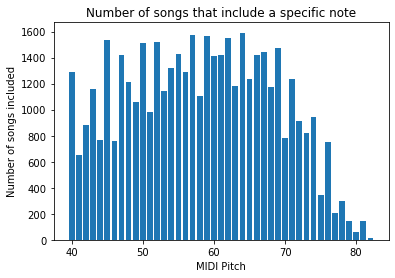

In [61]:
plt.bar(np.arange(E2, B5), pitch_histogram[E2:B5])
plt.ylabel("Number of songs included")
plt.title("Number of songs that include a specific note")
plt.xlabel("MIDI Pitch")
plt.show()

In [67]:
try:
    pitch_df[pitch_df["Valid?"]].to_csv("data\\ValidSingleGuitarSongs")
except FileNotFoundError:
    pitch_df[pitch_df["Valid?"]].to_csv(absolute_path + "\\data\\ValidSingleGuitarSongs")